In [1]:
import pandas as pd
import numpy as np
import sklearn.utils as sk
import mlfs.supervised_learning as sl
import mlfs.utils as ut

import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

In [3]:
# read population / profit
df1 = pd.read_csv('data/linear_regression_one_feature.csv')
features = ['population']
target   = ['profit']
X = df1[features]
y = df1[target]
m, n = np.shape(X)

maxX = X.max()[0]
minX = X.min()[0]

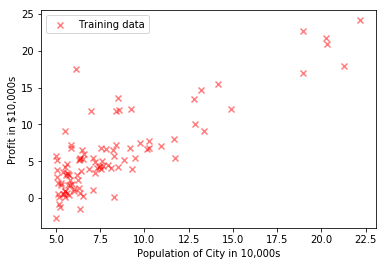

In [4]:
# plot raw data
plt.scatter(X, y, c="r", alpha=0.5, marker='x', label="Training data")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(loc=2)

In [5]:
# train
X = X.assign(x0=pd.Series(np.ones((m))).values)
model = sl.LinearRegression(alpha = 0.0001)
J_history, theta = model.train(X, y, num_iters=1000)
line = lambda x: x * theta[0] + theta[1]

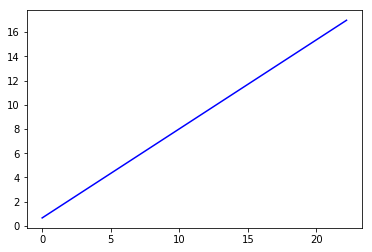

In [6]:
# plot raw data with linear regression
plt.plot([0.0, minX, maxX], [line(0.0), line(minX), line(maxX)], c="b", linestyle='solid', label="Linear regression")
plt.show()

In [7]:
# Visualizing J(theta)
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = pd.DataFrame(np.zeros((len(theta0_vals), len(theta1_vals))))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta1_vals[j], theta0_vals[i]]
        val, theta_grad = model.computeCost(X, y, t, m, n)
        J_vals.at[i, j] = val

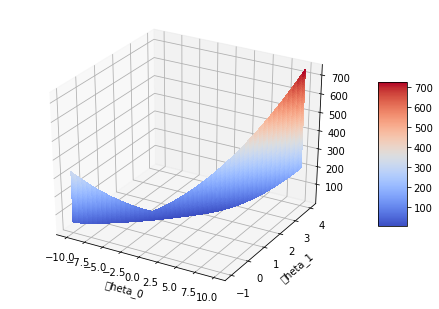

In [8]:
# Surface plot
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("\theta_0")
plt.ylabel("\theta_1")
plt.show()

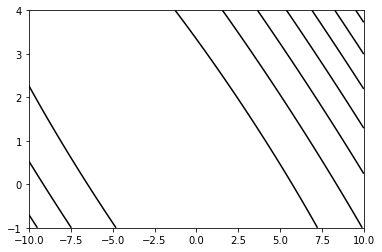

In [9]:
# Countour plot
plt.contour(theta0_vals, theta1_vals, J_vals, colors='black')
plt.show()

In [10]:
# Countour plot with logarithmic scale
cs = ax.contourf(theta0_vals, theta1_vals, J_vals, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.show()

In [11]:
# read housing data into a data frame
df2 = pd.read_csv('data/housting.csv')
features = ['size','bedrooms']
target   = ['price']
X = df2[features]
y = df2[target]
m, n = np.shape(X)

In [12]:
# train
wrangler = ut.DataWrangling()
X, _, _ = wrangler.normalize(X)
y, _, _ = wrangler.normalize(y)

X = X.assign(x0=pd.Series(np.ones((m))).values)
model = sl.LinearRegression(alpha = 0.0001)
J_history, theta = model.train(X, y, num_iters=1000)